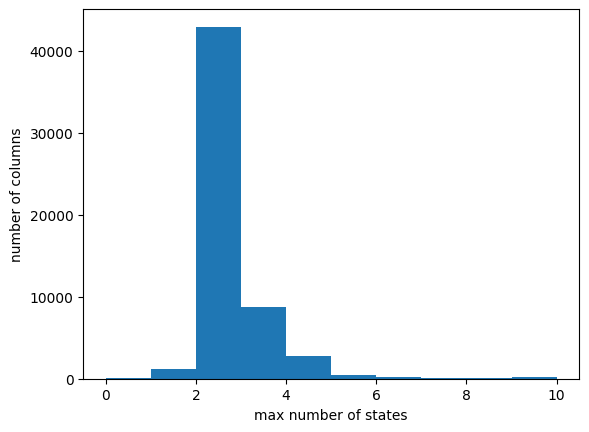

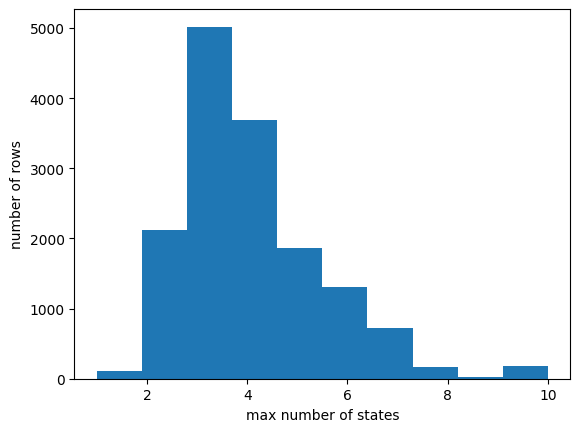

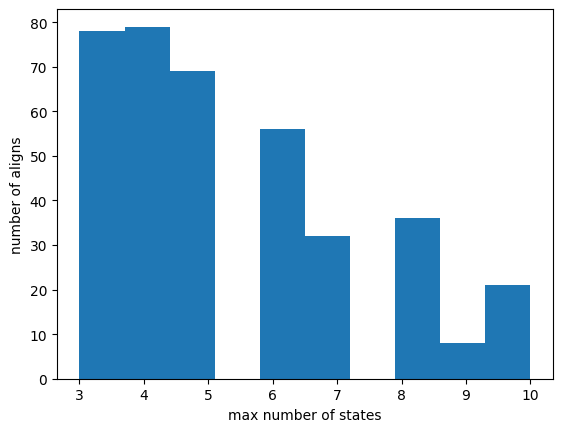

In [7]:
import os
import matplotlib.pyplot as plt
from Bio import AlignIO
from Bio.AlignIO.PhylipIO import RelaxedPhylipWriter
from Bio.SeqRecord import SeqRecord
from Bio.Align import MultipleSeqAlignment



states = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z", "!", "\"", "#", "$", "%", "&", "'", "(", ")", "*", "+",
",", "/", ":", ";", "<", "=", ">", "@", "[", "\\", "]", "^", "_", "{", "|", "}", "~"]
idx_for_state = {}
for i, state in enumerate(states):
    idx_for_state[state] = i
idx_for_state['-'] = -1
idx_for_state['?'] = -1

def determine_num_states(d):
    align_num_states = {}
    row_num_states = {}
    column_num_states = {}
    with os.scandir(d) as it:
        for entry in it:
            if not entry.is_file():
                continue
            try:
                align = AlignIO.read(os.path.join(d, entry.name), "phylip-relaxed")
            except:
                print(entry.name)
                continue
            column_maxima = [max([idx_for_state[char] + 1for char in rec.seq]) for rec in align]
            row_num_states[entry.name] = column_maxima
            align_num_states[entry.name] = max(column_maxima)
            column_num_states[entry.name] = [max([idx_for_state[record.seq[c]] + 1 for record in align]) for c in range(len(align[0].seq))]
    return (row_num_states, column_num_states, align_num_states)
            
            
def write_num_states():
    (_, _, num_states) = determine_num_states()
    outfile = open("temp/max_states.csv", 'w+')
    outfile.write("name,states\n")
    for (name, num) in num_states:
        outfile.write(name+"," + str(num) +"\n")
        
def plot_num_states(d):
    (row_wise, col_wise, align_wise) = determine_num_states(d)
    row_values = []
    col_values = []
    align_values = []
    for (name, col_maxima) in col_wise.items():
        col_values += col_maxima
        align_values.append(align_wise[name])
        row_values += (row_wise[name])
        
    plt.xlabel("max number of states")
    plt.ylabel("number of columns")
    plt.hist(col_values, bins=10)
    plt.show()
    
    plt.xlabel("max number of states")
    plt.ylabel("number of rows")
    plt.hist(row_values, bins=10)
    plt.show()
    
    plt.xlabel("max number of states")
    plt.ylabel("number of aligns")
    plt.hist(align_values, bins=10)
    plt.show()


d = "morph_alignments/multi/"
plot_num_states(d)